# Importing required libraries

In [1]:
import numpy as np
import pandas as pd

# Reading the data files

In [2]:
path = '../data/Met/'
train_data = pd.read_csv(path + 'Met_train.csv', header=0, sep=',')
test_data = pd.read_csv(path + 'Met_test.csv', header=0, sep=',')

train_test_ratio = len(test_data) / len(train_data)
print('%0.2f' % (train_test_ratio * 100), "%")

20.39 %


# Getting an overview of the data

In [3]:
# Displays the column headers and 5 first columns, useful to see if the data loaded correctly.
train_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog


# Plotting a time series
Pandas DataFrames has a built-in wrapper for the matplotlib.pyplot plot function.
We can simply pass the lists of columns in the DataFrame we want to plot. Let's plot a time series of the data.

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, sharex=True)  # Instantiate 4 subplots
# Define content of each subplot
plot1 = ['max_temp', 'min_temp']
plot2 = ['precipitation']
plot3 = ['site_count']
plot4 = ['request_count']
plots = [plot1, plot2, plot3, plot4]
# Define the style of each subplot
kinds = ['line', 'bar', 'bar', 'bar']

for (ax, plot, kind) in zip(axs, plots, kinds):
    train_data.plot('date', plot, kind=kind, ax=ax)  # Plot directly from the DataFrame variable
    ax.legend(loc='upper left',bbox_to_anchor=(1.05, 1))  # Position legend outside of the plots for visibility.

plt.locator_params(axis='x', nbins=10)  # Limits the number of timestamps shown on the x-axis.
plt.show()

<Figure size 640x480 with 4 Axes>

# Data correlation
The "seaborn" library offers a more high-level syntax and works great with pandas DataFrames.

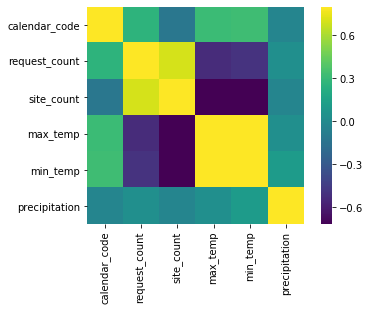

In [5]:
import seaborn as sns

corrmat = train_data.corr()  # Compute pairwise correlation of columns.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="viridis");